In [27]:
import numpy as np
import pandas as pd


# plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.style.use(['dark_background'])

# Synthetic dataset

In [21]:
np.random.seed(42)
n_samples = 10000

# === Numeric Features ===
feature_num1 = np.random.normal(loc=50, scale=10, size=n_samples)
feature_num2 = np.random.uniform(low=0, high=100, size=n_samples)

# === Categorical Features ===
cat1_choices = ['A', 'B', 'C']
cat2_choices = ['X', 'Y']
cat3_choices = ['Red', 'Green', 'Blue', 'Yellow']

feature_cat1 = np.random.choice(cat1_choices, size=n_samples).astype(object)
feature_cat2 = np.random.choice(cat2_choices, size=n_samples).astype(object)
feature_cat3 = np.random.choice(cat3_choices, size=n_samples).astype(object)

# === Target Variable ===
# Target is a noisy function of inputs + category encodings
target = (
    0.4 * np.nan_to_num(feature_num1)
    + 0.25 * feature_num2
    + np.where(feature_cat1 == 'A', 10, 0)
    + np.where(feature_cat2 == 'X', -5, 5)
    + np.random.normal(0, 5, size=n_samples)
)

# Inject outliers
outlier_indices = np.random.choice(n_samples, size=5, replace=False)
feature_num1[outlier_indices[:3]] = feature_num1[outlier_indices[:3]] + 80  # big positive outliers
feature_num2[outlier_indices[3:]] = feature_num2[outlier_indices[3:]] - 120  # big negative outliers

# Inject missing values
missing_indices = np.random.choice(n_samples, size=10, replace=False)
feature_num1[missing_indices[:5]] = np.nan
feature_cat2[missing_indices[5:]] = np.nan

# Combine into DataFrame
df = pd.DataFrame({
    'feature_num1': feature_num1,
    'feature_num2': feature_num2,
    'feature_cat1': feature_cat1,
    'feature_cat2': feature_cat2,
    'feature_cat3': feature_cat3,
    'target': target
})

# Display a sample
df.head(10)


,feature_num1,feature_num2,feature_cat1,feature_cat2,feature_cat3,target
0,54.967142,32.125517,C,Y,Green,41.243231
1,48.617357,10.301919,A,Y,Blue,43.383554
2,56.476885,7.180755,C,Y,Blue,32.790054
3,65.230299,9.427598,C,Y,Blue,32.322380
4,47.658466,58.286936,B,Y,Yellow,47.641281
5,47.658630,5.166218,C,X,Red,20.296309
6,65.792128,33.692687,A,X,Red,39.154831
7,57.674347,75.319970,B,X,Green,27.127514
8,45.305256,29.434817,C,X,Green,24.787135
9,55.425600,76.330808,B,X,Red,42.460479


# EDA
- Explore missing values
- Identify and visualize outliers

- Visualize predictive relationships:
    - Correlation matrix
    - Scatter plots (numeric vs. target)
    - Box plots (categorical vs. target)

### Missing values

In [22]:
missing_summary = df.isnull().sum()
missing_summary

feature_num1    5
feature_num2    0
feature_cat1    0
feature_cat2    5
feature_cat3    0
target          0
dtype: int64

In [24]:
df.feature_cat2.value_counts(dropna=False)

feature_cat2
Y      5100
X      4895
NaN       5
Name: count, dtype: int64

### check distributions of numeric features

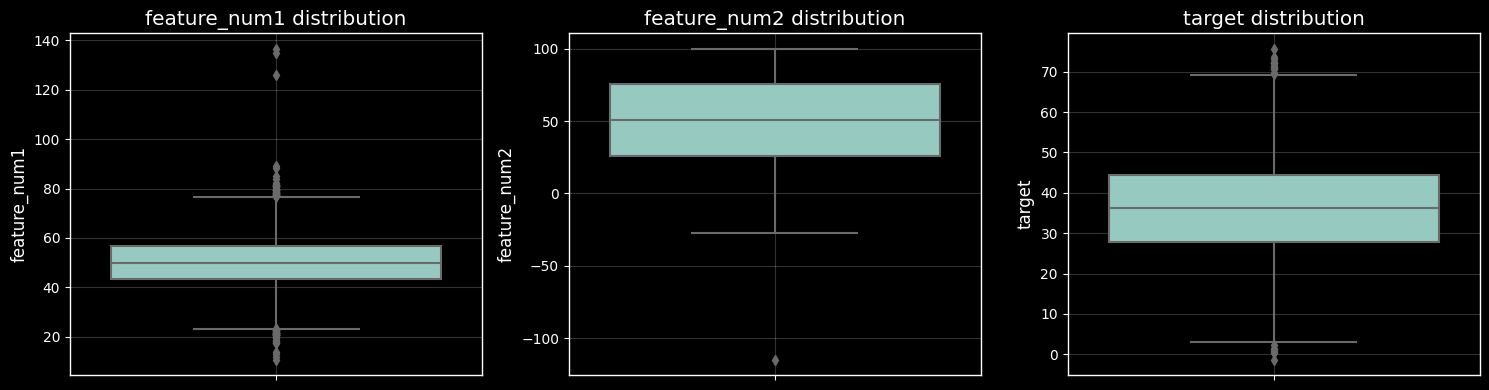

In [34]:
numeric_features = ['feature_num1', 'feature_num2', 'target']

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_features), figsize=(5 * len(numeric_features), 4))

for ax, col in zip(axes, numeric_features):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f'{col} distribution')
    ax.set_ylabel(col); ax.grid(alpha=0.2)

plt.tight_layout()

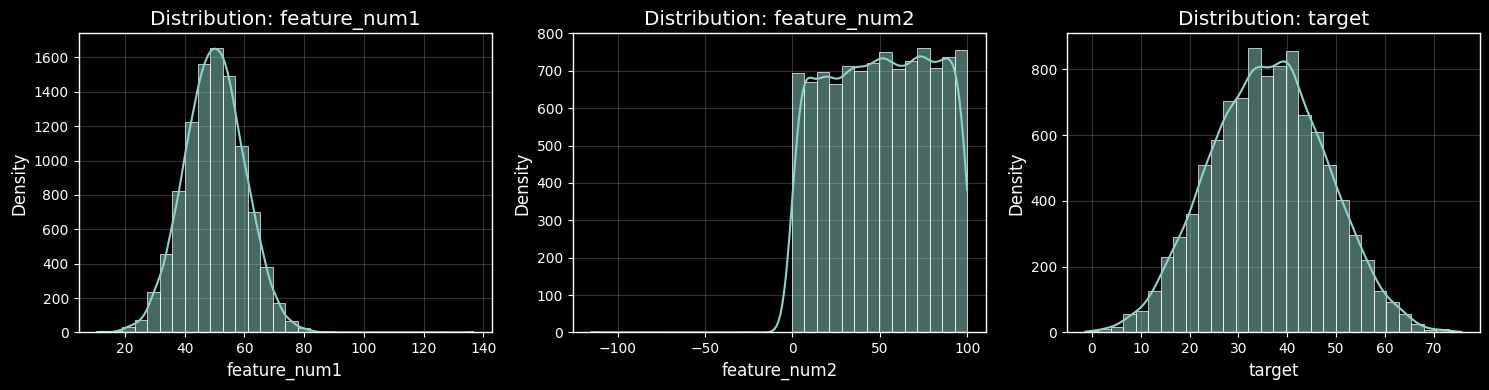

In [37]:
numeric_features = ['feature_num1', 'feature_num2', 'target']

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_features), figsize=(5 * len(numeric_features), 4))

for ax, col in zip(axes, numeric_features):
    sns.histplot(df[col], kde=True, ax=ax, bins=30)
    ax.set_title(f'Distribution: {col}')
    ax.set_ylabel('Density'); ax.grid(alpha=0.2)

plt.tight_layout()

### Check outliers of numeric features
- can either remove or winsorize depending on application

In [40]:
numeric_features = ['feature_num1', 'feature_num2', 'target']

# Compute z-scores manually
z_scores = np.abs((df[numeric_features] - df[numeric_features].mean()) / df[numeric_features].std())

# Count outliers (Z > 3)
outliers = (z_scores > 3).sum()
print("Outliers (Z > 3):")
print(outliers)

Outliers (Z > 3):
feature_num1    29
feature_num2     1
target           9
dtype: int64


### Check correlation matrix

In [42]:
# Correlation matrix for numeric variables
numeric_features = ['feature_num1', 'feature_num2', 'target']
corr = df[numeric_features].corr()
corr

,feature_num1,feature_num2,target
feature_num1,1.000000,-0.002677,0.328805
feature_num2,-0.002677,1.000000,0.610222
target,0.328805,0.610222,1.000000


### Check predictive power of the features

> numeric - scatter plots

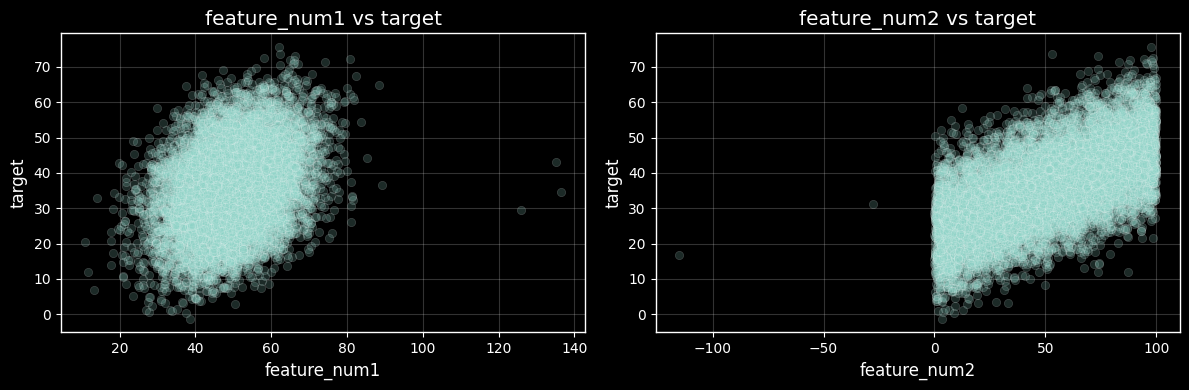

In [46]:
numeric_features = ['feature_num1', 'feature_num2', 'target']
target_col = 'target'

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(feature_names), figsize=(6 * len(feature_names), 4))

for ax, col in zip(axes, numeric_features):
    sns.scatterplot(data=df, x=col, y=target_col, ax=ax, alpha=0.2)
    ax.set_title(f'{col} vs {target_col}')
    ax.set_xlabel(col); ax.set_ylabel(target_col); ax.grid(alpha=0.2)

plt.tight_layout()

> categoricals

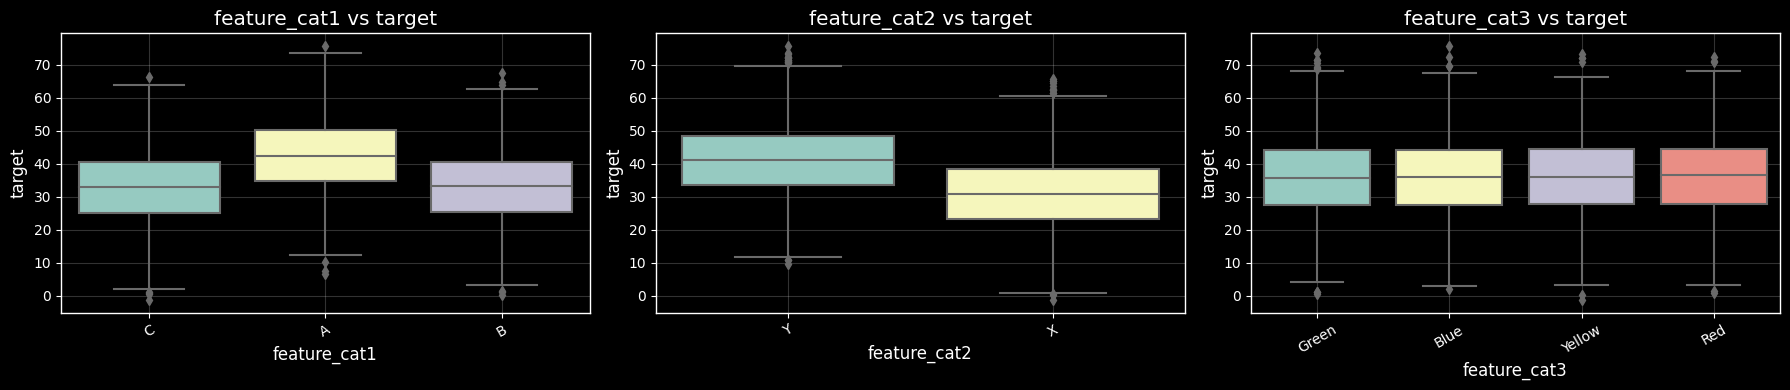

In [48]:
categorical_features = ['feature_cat1', 'feature_cat2', 'feature_cat3']
target_col = 'target'

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_features), figsize=(6 * len(categorical_features), 4))

for ax, col in zip(axes, categorical_features):
    sns.boxplot(data=df, x=col, y=target_col, ax=ax)
    ax.set_title(f'{col} vs {target_col}')
    ax.set_xlabel(col)
    ax.set_ylabel(target_col)
    ax.tick_params(axis='x', rotation=30)
    ax.grid(alpha=0.2)

plt.tight_layout()

# Prepare for Training

## Train test split

In [50]:
from sklearn.model_selection import train_test_split

def train_val_test_split(X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=None):
    """
    Splits X and y into train/val/test with given proportions.

    Returns:
        X_train, X_val, X_test, y_train, y_val, y_test
    """
    assert abs(train_size + val_size + test_size - 1.0) < 1e-6, "Proportions must sum to 1."

    # First split: train vs (val + test)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=(1.0 - train_size), random_state=random_state
    )

    # Second split: val vs test (on temp set)
    val_ratio = val_size / (val_size + test_size)  # relative size within the remaining 20%
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=(1.0 - val_ratio), random_state=random_state
    )

    return X_train, X_val, X_test, y_train, y_val, y_test

In [51]:
# Split features and target
X = df.drop(columns='target')
y = df['target']

# Call the split function
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, random_state=42)

# Check sizes
print(f"Train: {len(X_train)} samples")
print(f"Validation: {len(X_val)} samples")
print(f"Test: {len(X_test)} samples")

Train: 8000 samples
Validation: 1000 samples
Test: 1000 samples


## Impute using means and mode 
could also just drop 

In [57]:
# Separate feature types
numeric_features = ['feature_num1', 'feature_num2']
categorical_features = ['feature_cat1', 'feature_cat2', 'feature_cat3']

# === Compute imputation values from training set ===

# For numeric: use mean
numeric_means = X_train[numeric_features].mean()

# Apply numeric mean imputation
X_train[numeric_features] = X_train[numeric_features].fillna(numeric_means)
X_val[numeric_features] = X_val[numeric_features].fillna(numeric_means)
X_test[numeric_features] = X_test[numeric_features].fillna(numeric_means)


# For categorical: use most frequent value
categorical_modes = X_train[categorical_features].mode().iloc[0]

# Apply categorical mode imputation
X_train[categorical_features] = X_train[categorical_features].fillna(categorical_modes)
X_val[categorical_features] = X_val[categorical_features].fillna(categorical_modes)
X_test[categorical_features] = X_test[categorical_features].fillna(categorical_modes)

# verify no nulls
display('train',X_train.isnull().sum())
display('valid',X_val.isnull().sum())
display('test',X_test.isnull().sum())

'train'

feature_num1    0
feature_num2    0
feature_cat1    0
feature_cat2    0
feature_cat3    0
dtype: int64

'valid'

feature_num1    0
feature_num2    0
feature_cat1    0
feature_cat2    0
feature_cat3    0
dtype: int64

'test'

feature_num1    0
feature_num2    0
feature_cat1    0
feature_cat2    0
feature_cat3    0
dtype: int64

## Encode categoricals
Unnecessary for xgboost

In [58]:
from sklearn.preprocessing import OrdinalEncoder

# Define categorical and numerical columns
categorical_cols = ['feature_cat1', 'feature_cat2', 'feature_cat3']
numerical_cols = ['feature_num1', 'feature_num2']

# Fit encoder on training data only
encoder = OrdinalEncoder()
X_train_cat = encoder.fit_transform(X_train[categorical_cols])

# Apply to val/test using the same encoder
X_val_cat = encoder.transform(X_val[categorical_cols])
X_test_cat = encoder.transform(X_test[categorical_cols])

# Combine with numeric features
X_train_all = np.hstack([X_train_cat, X_train[numerical_cols].values])
X_val_all = np.hstack([X_val_cat, X_val[numerical_cols].values])
X_test_all = np.hstack([X_test_cat, X_test[numerical_cols].values])

> for xgboost all we need to do is assign them as cat cols

In [60]:
# Assume your categorical features are named
categorical_features = ['feature_cat1', 'feature_cat2', 'feature_cat3']

# Cast to categorical in all splits
for col in categorical_features:
    X_train[col] = X_train[col].astype('category')
    X_val[col] = X_val[col].astype('category')
    X_test[col] = X_test[col].astype('category')

## Set up dMatrices

In [64]:
import xgboost as xgb

# Create DMatrix objects
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dval = xgb.DMatrix(X_val, label=y_val, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Tune and Train

### Tune with optuna

In [67]:
import optuna

def objective(trial):
    param = {
        "booster": "gbtree",
        "objective": "reg:squarederror",
        "eval_metric": "rmse",
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "lambda": trial.suggest_float("lambda", 1e-4, 10.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-4, 10.0, log=True),
        "min_child_weight": trial.suggest_float("min_child_weight", 1, 10),
    }

    model = xgb.train(
        param,
        dtrain,
        num_boost_round=1000,
        evals=[(dval, "validation")],
        early_stopping_rounds=25,
        verbose_eval=False
    )

    preds = model.predict(dval)
    rmse = np.sqrt(np.mean((preds - y_val) ** 2))
    return rmse

# Run study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=5)

print("Best trial:")
print(study.best_trial)

[I 2025-07-08 16:54:07,141] A new study created in memory with name: no-name-fadf8771-de56-49aa-8f41-555a566bf5ff
[I 2025-07-08 16:54:09,461] Trial 0 finished with value: 4.901036287691244 and parameters: {'max_depth': 3, 'learning_rate': 0.05030817986191513, 'subsample': 0.7117115773725682, 'colsample_bytree': 0.6806261876572827, 'lambda': 0.00018985176612226296, 'alpha': 0.0006995683269906829, 'min_child_weight': 7.295544242406807}. Best is trial 0 with value: 4.901036287691244.
[I 2025-07-08 16:54:11,197] Trial 1 finished with value: 5.449340137354294 and parameters: {'max_depth': 10, 'learning_rate': 0.1848449180804575, 'subsample': 0.6807494288862457, 'colsample_bytree': 0.9366165787699908, 'lambda': 0.026781467755294164, 'alpha': 0.00011995836455858749, 'min_child_weight': 7.563241276667679}. Best is trial 0 with value: 4.901036287691244.
[I 2025-07-08 16:54:12,896] Trial 2 finished with value: 5.315122754604543 and parameters: {'max_depth': 9, 'learning_rate': 0.1225097301935433

Best trial:
FrozenTrial(number=0, state=TrialState.COMPLETE, values=[4.901036287691244], datetime_start=datetime.datetime(2025, 7, 8, 16, 54, 7, 144540), datetime_complete=datetime.datetime(2025, 7, 8, 16, 54, 9, 461324), params={'max_depth': 3, 'learning_rate': 0.05030817986191513, 'subsample': 0.7117115773725682, 'colsample_bytree': 0.6806261876572827, 'lambda': 0.00018985176612226296, 'alpha': 0.0006995683269906829, 'min_child_weight': 7.295544242406807}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'learning_rate': FloatDistribution(high=0.3, log=True, low=0.01, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'lambda': FloatDistribution(high=10.0, log=True, low=0.0001, step=None), 'alpha': FloatDistribution(high=10.0, log=True, low=0.0001, step=None), 'min_child_weight': FloatD

### Retrain final model

In [68]:
# Combine training and validation sets
X_trainval_all = np.vstack([X_train_all, X_val_all])
y_trainval = np.concatenate([y_train, y_val])

# Create final training DMatrix
dtrainval = xgb.DMatrix(X_trainval_all, label=y_trainval)

# Use test DMatrix from earlier
# dtest = xgb.DMatrix(X_test_all, label=y_test)

# Extract best params and add fixed entries
best_params = study.best_trial.params

# Add required objective, metric, and any other fixed values
best_params.update({
    "booster": "gbtree",
    "objective": "reg:squarederror",  # change to "binary:logistic" for classification
    "eval_metric": "rmse"
})

# Retrain model
final_model = xgb.train(
    best_params,
    dtrainval,
    num_boost_round=study.best_trial.number + 50  # or manually pick a larger value
)

# Optional: predict on test set
preds_test = final_model.predict(dtest)

# Evaluate
rmse_test = np.sqrt(np.mean((preds_test - y_test) ** 2))
print(f"Test RMSE: {rmse_test:.4f}")

Test RMSE: 17.2775


# Feature importances
- 'gain': average improvement in loss when the feature is used in a split (most informative).

- 'weight': number of times a feature is used in splits (can overvalue repeated but weak features).

- 'cover': average coverage (number of samples affected) per split involving the feature.

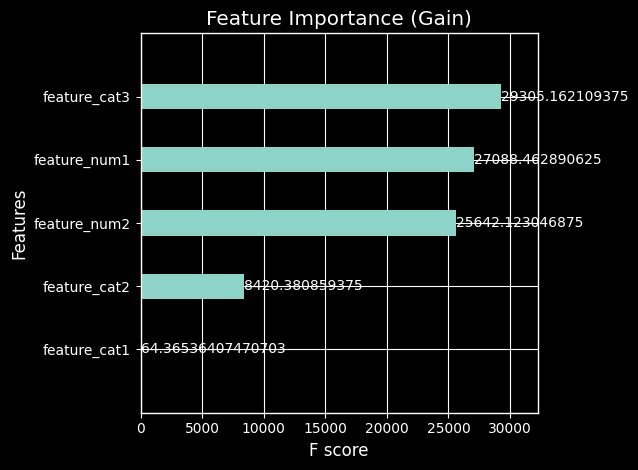

In [72]:
# Assign feature names to the booster (for plotting)
final_model.feature_names = list(X_train.columns)

# Plot importance (by gain, cover, or weight)
xgb.plot_importance(
    final_model,
    importance_type='gain',   # alternatives: 'weight', 'cover'
    max_num_features=10,      # adjust as needed
    height=0.4
)
plt.title("Feature Importance (Gain)")
plt.tight_layout()

# Shap

- each feature’s global impact on the prediction distribution.

- Color encodes the feature value (low = blue, high = red).

- Horizontal axis is the SHAP value: how much a feature contributes (positively or negatively) to the prediction.

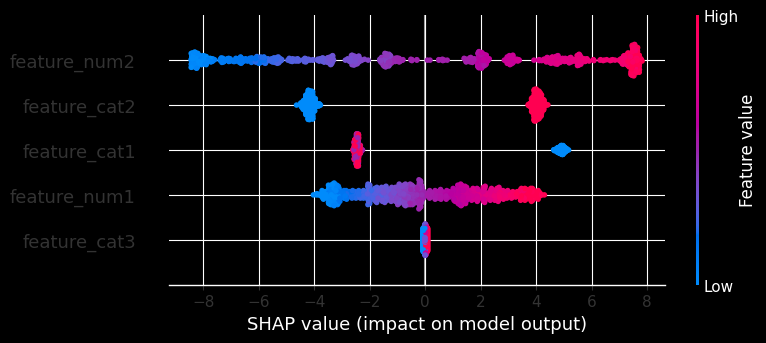

In [75]:
import shap

# Load JS visualization support
shap.initjs()

# Use TreeExplainer for XGBoost model
explainer = shap.Explainer(final_model)

# Compute SHAP values on the test set
shap_values = explainer(X_test_all)

# Convert feature names for SHAP plots
shap_values.feature_names = encoded_feature_names

# Summary plot (global importance)
shap.plots.beeswarm(shap_values, max_display=10)

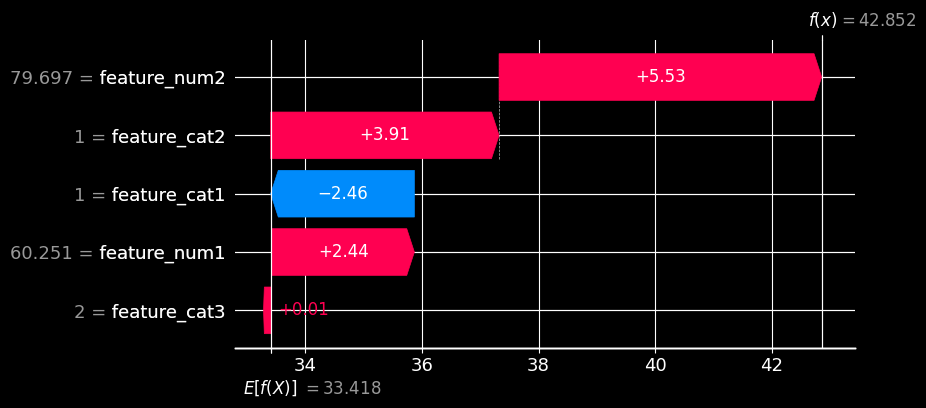

In [76]:
# Example: explanation for the first test instance
shap.plots.waterfall(shap_values[0])

# Partial dependence plots (sklearn)

PDPs work best for features with a monotonic or linear influence, though they can still be informative for non-linear ones.

For categorical variables, PDPs assume ordinal relationships (because we encoded them that way). For interpretability, be cautious if the encoding does not represent meaningful order.

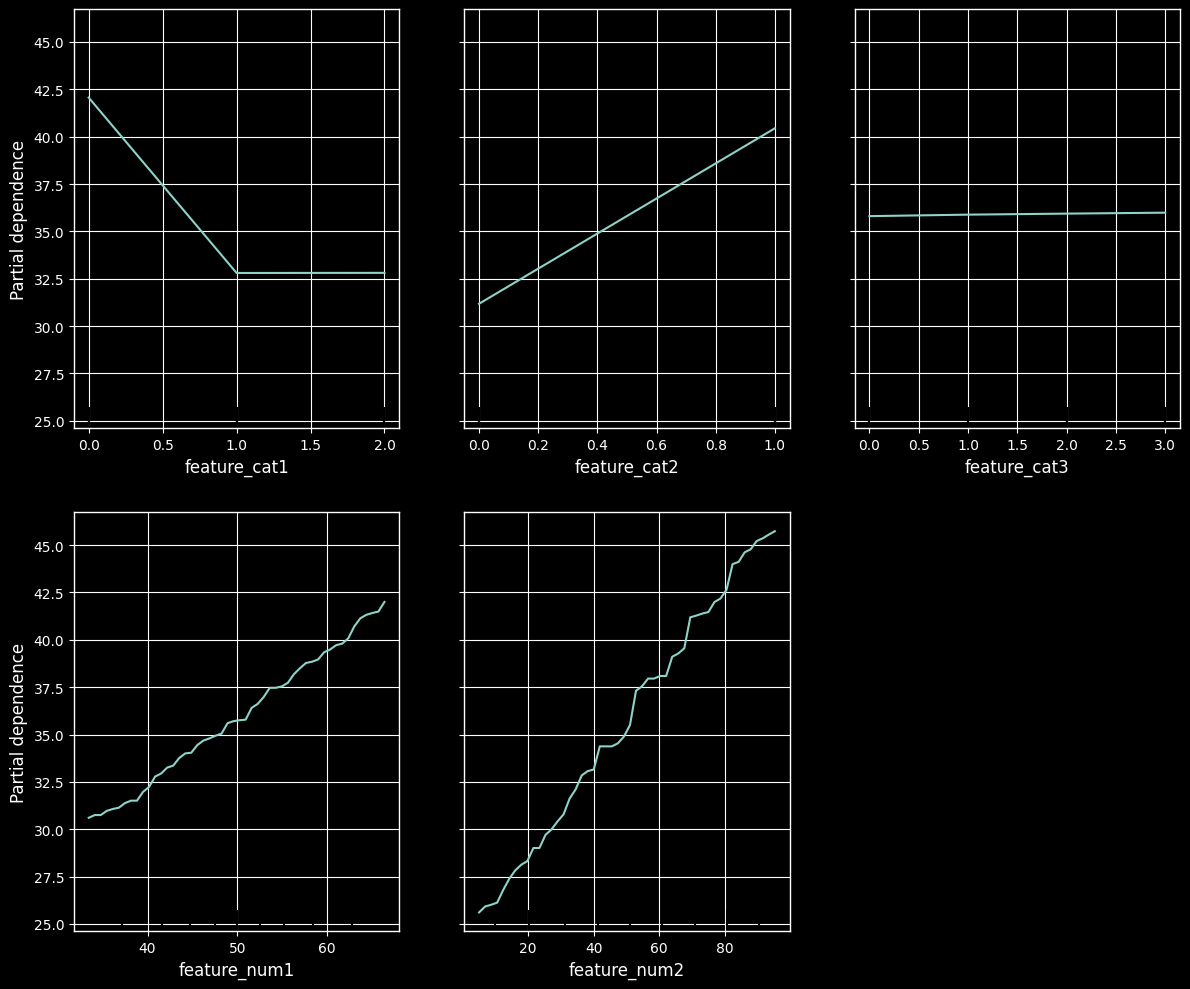

In [85]:
from xgboost import XGBRegressor
from sklearn.inspection import PartialDependenceDisplay

# Wrap the model as an XGBRegressor from sklearn
xgb_model = XGBRegressor(**best_params)
xgb_model.fit(X_trainval_all, y_trainval)  # re-train for sklearn compatibility

# Plot PDPs for all features
fig, ax = plt.subplots(figsize=(12, 10))
PartialDependenceDisplay.from_estimator(
    xgb_model,
    X_trainval_all,
    features=list(range(X_trainval_all.shape[1])),  # indices of features
    feature_names=encoded_feature_names,
    grid_resolution=50,
    ax=ax
)

plt.tight_layout()